# Overview

The goal of this tutorial is to provide an overview of the use of the NumPy library. It tries to hit all of the important parts , but it is by no means comprehensive. For more information, try looking at the:
- [Tentative NumPy Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)
- [NumPy User Guide](http://docs.scipy.org/doc/numpy/user/)
- [Introduction to NumPy from SAM](http://www.sam.math.ethz.ch/~raoulb/teaching/PythonTutorial/intro_numpy.html)

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

The NumPy array object is the common interface for working with typed arrays of data across a wide-variety of scientific Python packages. NumPy also features a C-API, which enables interfacing existing Fortran/C/C++ libraries with Python and NumPy.

# Basic Usage

The NumPy array represents a *contiguous* block of memory, holding entries of a given type (and hence fixed size). The entries are laid out in memory according to the shape, or list of dimension sizes.

In [1]:
# Convention for import to get shortened namespace
import numpy as np

In [2]:
# Create a simple array from a list of integers
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [3]:
# Print out the shape attribute
a.shape

(3,)

In [4]:
# And now the data type
a.dtype

dtype('int64')

In [5]:
# This time use a list of floats
a = np.array([1., 2., 3., 4., 5.])
a

array([ 1.,  2.,  3.,  4.,  5.])

In [6]:
a.shape

(5,)

In [7]:
a.dtype

dtype('float64')

NumPy also provides helper functions for generating arrays of data. `arange` for instance creates a range of values.

In [8]:
a = np.arange(5)
print(a)

[0 1 2 3 4]


In [9]:
a = np.arange(1, 10, 2)
print(a)

[1 3 5 7 9]


`linspace` is similar, but is used to create a linearly spaced array of values.

In [10]:
b = np.linspace(5, 15, 5)
print(b)

[  5.    7.5  10.   12.5  15. ]


NumPy also provides simple ways of performing mathematical operations. For instance, in core Python, you can do:

In [11]:
print([x + y for x,y in zip(a,b)])

[6.0, 10.5, 15.0, 19.5, 24.0]


Using NumPy this becomes:

In [12]:
a + b

array([  6. ,  10.5,  15. ,  19.5,  24. ])

In [13]:
a * b

array([   5. ,   22.5,   50. ,   87.5,  135. ])

In [14]:
t = np.arange(0, 2 * np.pi, np.pi / 4)
t

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714])

NumPy also provides mathematical functions that operate on arrays:

In [15]:
np.sin(t)

array([  0.00000000e+00,   7.07106781e-01,   1.00000000e+00,
         7.07106781e-01,   1.22464680e-16,  -7.07106781e-01,
        -1.00000000e+00,  -7.07106781e-01])

# Basic Plotting

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [16]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

In [17]:
from IPython.display import display

# Set-up the IPython notebook to put plots inline
%matplotlib inline

In [18]:
# Create some example data
x = np.linspace(0, 2, 100)

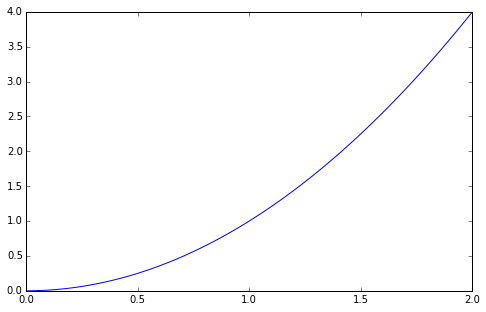

In [19]:
# Go ahead and explicitly create a figure and an axes
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

# Plot our x variable on the x-axis and x^2 on the y-axis
ax.plot(x, x**2)

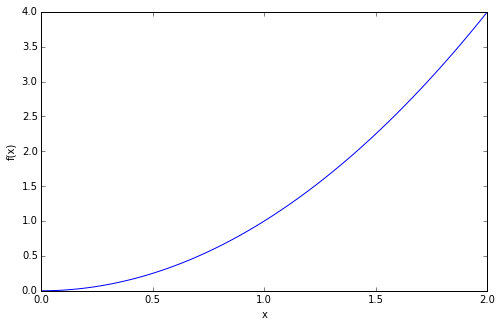

In [20]:
# Add some labels to the plot
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# Needed to reuse and see the updated plot while using inline
display(fig)

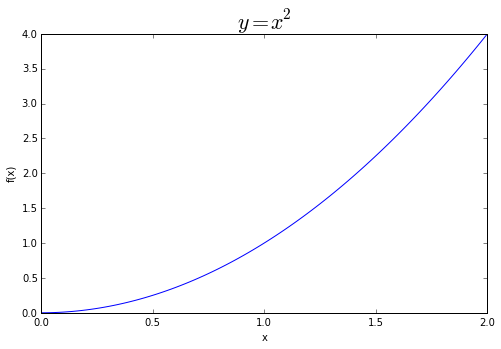

In [21]:
# Let's add a title with a bit of latex syntax
ax.set_title('$y = x^2$', fontdict={'size':22})

display(fig)

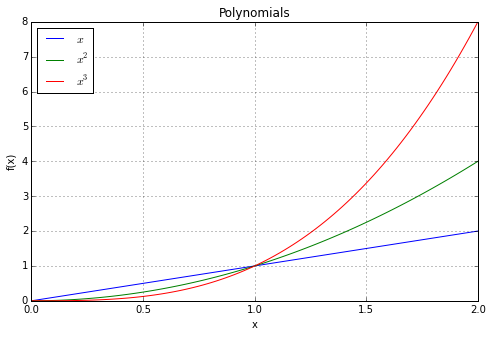

In [22]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

# Plot a set of different polynomials. The label argument is used when generating a legend.
ax.plot(x, x, label='$x$')
ax.plot(x, x * x, label='$x^2$')
ax.plot(x, x**3, label='$x^3$')

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Polynomials')

# Add gridlines
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')

## Exercise

Make a plot containing:
- 3 different plots with different styles. Suggestions:
  - sin, cos, tan
  - exp, log
  - sqrt
  - Any others you want to try
- Use labels and a legend
- Add labels and title

# Indexing and Slicing

Indexing is how we pull individual data items out of an array. Slicing extends this process to pulling out a regular set of the items.

In [23]:
# Create an array for testing
a = np.arange(12).reshape(3, 4)

In [24]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Indexing in Python is 0-based, so the command below looks for the 2nd item along the first dimension and the 3rd along the second dimension.

In [25]:
a[1, 2]

6

Can also just index on one dimension

In [26]:
a[2]

array([ 8,  9, 10, 11])

Negative indices are also allowed, which permit indexing relative to the end of the array.

In [27]:
a[0, -1]

3

Slicing syntax is written as `start:stop[:step]`, where all numbers are optional. Start defaults to 0, end to len(dim), and step to 1. The second colon is also optional if no step is used. It should be noted that end represents one past the last item; one can also think of it as a half open interval: `[start, end)`

In [28]:
a[1:3]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
a[::2, ::2]

array([[ 0,  2],
       [ 8, 10]])

In [30]:
a[:, 2]

array([ 2,  6, 10])

In [31]:
# ... can be used to replace one or more full slices
a[..., 2]

array([ 2,  6, 10])

## Exercises

Using the data below, write code to solve the commented problems.

In [32]:
a = np.arange(60).reshape(3, 4, 5)

In [33]:
# Decimate the data by a factor of 3 along all dimensions

In [34]:
# Pull out the 2nd 4x5 slice

In [35]:
# Grab the last column from all dimensions (result should be 3x4)

# Broadcasting

"The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation." (NumPy User Guide)

In [36]:
# Create some test data
a = np.linspace(0, np.pi, 4)
a

array([ 0.        ,  1.04719755,  2.0943951 ,  3.14159265])

NumPy can perform operations between arrays and constants:

In [37]:
a * 2

array([ 0.        ,  2.0943951 ,  4.1887902 ,  6.28318531])

This extends to operations between arrays of different sizes:

In [38]:
a * np.array([2])

array([ 0.        ,  2.0943951 ,  4.1887902 ,  6.28318531])

In [39]:
b = np.linspace(0, 50, 5)

In [40]:
print(a.shape)
print(b.shape)

(4,)
(5,)


In [41]:
# This will not work, however, because the array sizes cannot be rectified
a * b

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

Broadcasting works by:
1. Make the arrays have the same number of dimensions. If they are different, size-1 dimensions are *prepended* implicitly
2. Check that each dimension is compatible--that they are the same or one of them is 1

In [42]:
# If we add a size-1 dimension to a they can be rectified. The process of broadcasting will implicitly add a 
a = a.reshape((-1, 1))
print(a.shape)

(4, 1)


In [43]:
result = a * b
result

array([[   0.        ,    0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,   13.08996939,   26.17993878,   39.26990817,
          52.35987756],
       [   0.        ,   26.17993878,   52.35987756,   78.53981634,
         104.71975512],
       [   0.        ,   39.26990817,   78.53981634,  117.80972451,
         157.07963268]])

In [44]:
result.shape

(4, 5)

## Exercise

Create a 1D array of 100 x values between -3 and 3, and a 1D array of 150 y values between -5 and 5. Use these to calculate an array of radius values.

Radius can be calculated as:
$r = \sqrt{x^2 + y^2}$

# Logical Indexing

Logical indexing allows selecting elements from an array using a second array of `True` and `False` values.

In [45]:
# Create some synthetic data representing temperature and wind speed data
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 40 + 2 * np.random.randn(100)
spd = np.abs(10 * np.sin(np.linspace(0, 2 * np.pi, 100)) + 10 + 5 * np.random.randn(100))

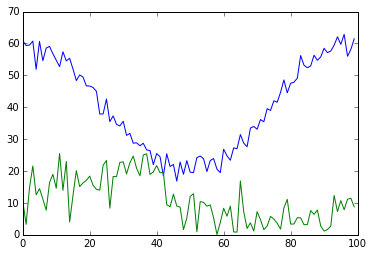

In [46]:
plt.plot(temp)
plt.plot(spd)

In [47]:
# By doing a comparision between a NumPy array and a value, we get an
# array of values representing the results of the comparison between
# each element and the value
temp > 50

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [48]:
# We can take the resulting array and use this to index into the NumPy
# array and retrieve the values where the result was true
temp[temp > 50]

array([ 60.8676209 ,  59.35448613,  59.49394611,  60.73812855,
        51.90003813,  60.65883616,  54.59708268,  58.56290226,
        59.08082371,  56.77341418,  54.76394141,  52.75189716,
        57.40983029,  54.54850728,  55.35830706,  51.98416883,
        50.13664786,  56.20308627,  53.16917519,  52.40811641,
        52.97302918,  56.329414  ,  54.73262208,  55.7866219 ,
        58.48763036,  57.1285165 ,  57.64353231,  59.44908664,
        62.09504137,  59.7321195 ,  62.86415319,  55.99362371,
        58.14190755,  61.47508412])

In [49]:
# So long as the size of the boolean array matches the data, the
# boolean array can come from anywhere
temp[spd > 10]

array([ 60.8676209 ,  59.49394611,  60.73812855,  51.90003813,
        60.65883616,  54.59708268,  59.08082371,  56.77341418,
        54.76394141,  52.75189716,  57.40983029,  54.54850728,
        51.98416883,  48.37378375,  50.13664786,  49.47200481,
        46.70106188,  46.66156549,  46.21104421,  44.98586452,
        37.86144096,  37.91575823,  42.58048436,  37.28071139,
        34.64750524,  34.14035403,  35.61302667,  31.1724218 ,
        31.80136948,  28.72794371,  28.85339189,  27.92665668,
        28.70355711,  26.6263669 ,  26.42264325,  21.99635342,
        25.48056486,  24.49091742,  18.49536744,  22.06613974,
        19.62399626,  19.52414449,  24.72266759,  23.85741683,
        31.43445167,  44.51622118,  59.44908664,  59.7321195 ,
        55.99362371,  58.14190755])

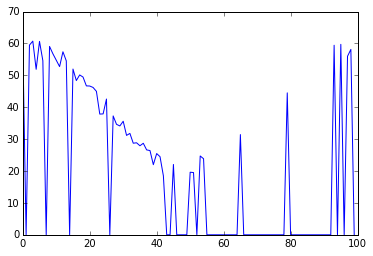

In [50]:
# Make a copy so we don't modify the original data
temp2 = temp.copy()

# Replace all places where spd is <10 with 0.
temp2[spd < 10] = 0
plt.plot(temp2)

In [51]:
# Can also combine multiple boolean arrays using the syntax for bitwise operations
# *MUST HAVE PARENTHESES* due to operator precedence
temp[(temp < 45) & (spd > 10)]

array([ 44.98586452,  37.86144096,  37.91575823,  42.58048436,
        37.28071139,  34.64750524,  34.14035403,  35.61302667,
        31.1724218 ,  31.80136948,  28.72794371,  28.85339189,
        27.92665668,  28.70355711,  26.6263669 ,  26.42264325,
        21.99635342,  25.48056486,  24.49091742,  18.49536744,
        22.06613974,  19.62399626,  19.52414449,  24.72266759,
        23.85741683,  31.43445167,  44.51622118])

# Masked Arrays

Masked arrays are a specialization of NumPy arrays to handle flagging individual elements as masked. This allows elminating values from plots and from computations.

In [52]:
# Create a masked array of temperature, masking values where speed is < 10
temp_masked = np.ma.array(temp, mask=spd < 10)

In [53]:
temp_masked

masked_array(data = [60.86762090052186 -- 59.49394610895407 60.73812855472808 51.9000381284911
 60.6588361563057 54.597082676446135 -- 59.080823707974744
 56.77341418356993 54.76394140802108 52.75189715953514 57.409830289343226
 54.54850728224254 -- 51.984168826404584 48.373783749635905
 50.13664785970006 49.47200481162552 46.70106188162949 46.661565493814514
 46.21104420801405 44.98586452422152 37.861440962298865 37.91575823102248
 42.5804843559418 -- 37.28071139300644 34.64750523559294 34.1403540328726
 35.6130266712599 31.172421800921274 31.80136948140769 28.72794371105262
 28.85339188529238 27.926656678420912 28.70355711129988 26.62636689786126
 26.422643246192898 21.996353423292987 25.480564864756097
 24.490917421592567 18.495367441785582 -- -- 22.066139743291913 -- -- -- --
 19.623996264948367 19.52414448563015 -- 24.72266758567555
 23.85741682965147 -- -- -- -- -- -- -- -- -- -- 31.434451672744228 -- --
 -- -- -- -- -- -- -- -- -- -- -- 44.51622118444983 -- -- -- -- -- -- -- --


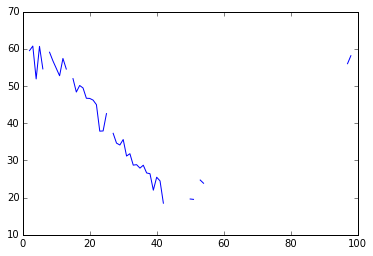

In [54]:
plt.plot(temp_masked)

In [55]:
# Masked values can be set after array creation by setting the corresponding value to the special value of ma.masked
temp_masked[temp_masked > 45] = np.ma.masked

In [56]:
temp_masked

masked_array(data = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 44.98586452422152 37.861440962298865 37.91575823102248 42.5804843559418 --
 37.28071139300644 34.64750523559294 34.1403540328726 35.6130266712599
 31.172421800921274 31.80136948140769 28.72794371105262 28.85339188529238
 27.926656678420912 28.70355711129988 26.62636689786126 26.422643246192898
 21.996353423292987 25.480564864756097 24.490917421592567
 18.495367441785582 -- -- 22.066139743291913 -- -- -- -- 19.623996264948367
 19.52414448563015 -- 24.72266758567555 23.85741682965147 -- -- -- -- -- --
 -- -- -- -- 31.434451672744228 -- -- -- -- -- -- -- -- -- -- -- -- --
 44.51622118444983 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 --],
             mask = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False  True False False False False False False False False False
 False False Fa

(0, 65)

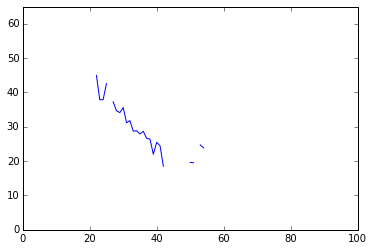

In [57]:
plt.plot(np.arange(temp_masked.size), temp_masked)

# Set plot limits to the same as before
plt.xlim(0, 100)
plt.ylim(0, 65)

## Exercise

Currently, the integral in the code below results in a bad value. Using masked arrays, fix this so that the integral returns the proper value of `2.393`.

Hint: look at `np.isnan()`

In [58]:
t = np.linspace(0, 2*np.pi, 200)
x = np.sqrt(np.sin(t))
print np.trapz(x, t)

SyntaxError: invalid syntax (<ipython-input-58-58004fa61d6a>, line 3)